In [47]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline


In [67]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
        # Array to hold distance between X[i] and each centroids[j]
        distance = [] 
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)
        
        
            
            
        
     ### END CODE HERE ###
    
    return idx

In [63]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [69]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [73]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for k in range(K):   
          points = X[idx == k]# Your code here to get a list of all data points in X assigned to centroid k  
          centroids[k] =np.mean(points, axis = 0)
        
        
    ### END CODE HERE ## 
    
    return centroids

In [53]:
original_img = plt.imread('dog.png')

Shape of original_img is: (372, 258, 4)


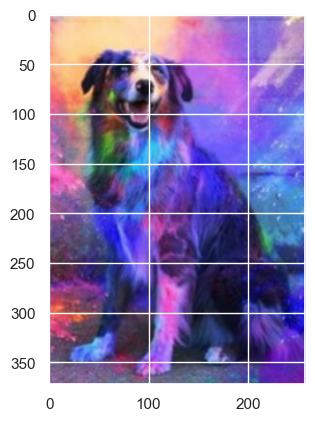

In [55]:
plt.imshow(original_img)
print("Shape of original_img is:", original_img.shape)

In [57]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 4))

In [75]:
K = 16
max_iters = 10

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [77]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (95976,)
Closest centroid for the first five elements: [12 12 12 12 12]


In [79]:
import numpy as np
import matplotlib.pyplot as plt

def plot_kMeans_RGB(original_img, X_img, centroids, idx, K):
    # Ensure idx is an integer array
    idx = idx.astype(int)
    
    # Replacing each pixel with its centroid color
    X_recovered = centroids[idx]

    # Reshape back to image dimensions
    X_recovered = np.reshape(X_recovered, (original_img.shape[0], original_img.shape[1], 4))  # Keep 4 channels

    # Plot the original image and the clustered image side by side
    plt.figure(figsize=(10, 5))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)  # Use the original RGBA image directly
    plt.title('Original Image')
    plt.axis('off')  # Turn off axis labels
    
    # Clustered Image
    plt.subplot(1, 2, 2)
    plt.imshow(X_recovered)  # Show the clustered image
    plt.title(f'K-Means Clustered Image with K={K}')
    plt.axis('off')  # Turn off axis labels
    
    plt.show()

# Example usage
# plot_kMeans_RGB(original_img, X_img, centroids, idx, K)



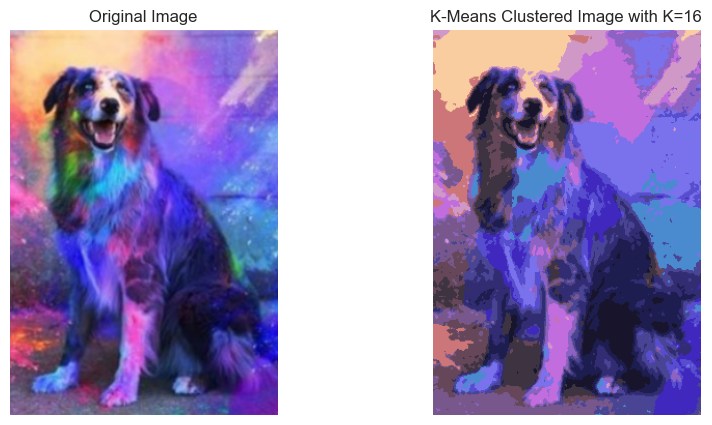

In [81]:
plot_kMeans_RGB(original_img, X_img, centroids, idx, K)



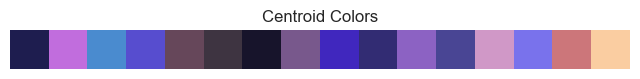

In [83]:
def show_centroid_colors(centroids):
    # Ensure centroids are in the correct format (3 channels for RGB)
    centroids_rgb = centroids[:, :3]  # Select only the RGB values (if they are in RGBA)
    
    # Create a figure to display the centroid colors
    plt.figure(figsize=(8, 2))
    plt.imshow([centroids_rgb])  # Display as a single row of colors
    plt.title('Centroid Colors')
    plt.axis('off')  # Hide the axis
    plt.show()

show_centroid_colors(centroids)